Project: Visualizing the History of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In this project, I explored and answered several questions related to this prizewinning data. 

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nobel_prize_df = pd.read_csv('data/nobel.csv')

1.- What is the most commonly awarded gender and birth country?

Answers were stored as string variables top_gender and top_country

In [2]:
top_gender = nobel_prize_df['gender'].mode().values[0]
top_country = nobel_prize_df['birth_country'].mode().values[0]
print('Top gender: ' + top_gender)
print('Top country: ' + top_country)

Top gender: male
Top country: USA


2.- Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Result was stored as an integer called max_decade_usa.

Decade with highest ratio of US-born Nobel Prize winners : 2000


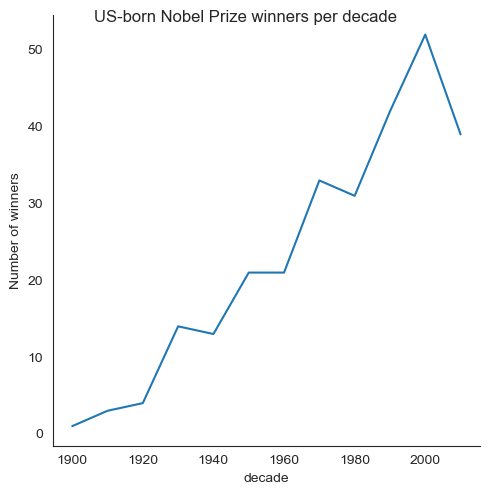

In [3]:
nobel_prize_df['is_from_us'] = nobel_prize_df['birth_country'] == 'USA'
nobel_prize_df['decade'] = (nobel_prize_df['awardYear'] // 10) * 10
total_by_decade = nobel_prize_df.groupby('decade').size()
total_by_decade_us = nobel_prize_df[nobel_prize_df['is_from_us']].groupby('decade').size()
ratio = total_by_decade_us / total_by_decade
max_decade_usa = ratio.idxmax()
print('Decade with highest ratio of US-born Nobel Prize winners : ' + str(max_decade_usa))

sns.set_style('white')
g = sns.relplot(data=total_by_decade_us,kind='line')
g.figure.suptitle('US-born Nobel Prize winners per decade')
g.set(ylabel='Number of winners')
plt.show()

3.- Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Result was stored as a dictionary called max_female_dict where the decade is the key and the category is the value.

{'2010': 'Peace'}


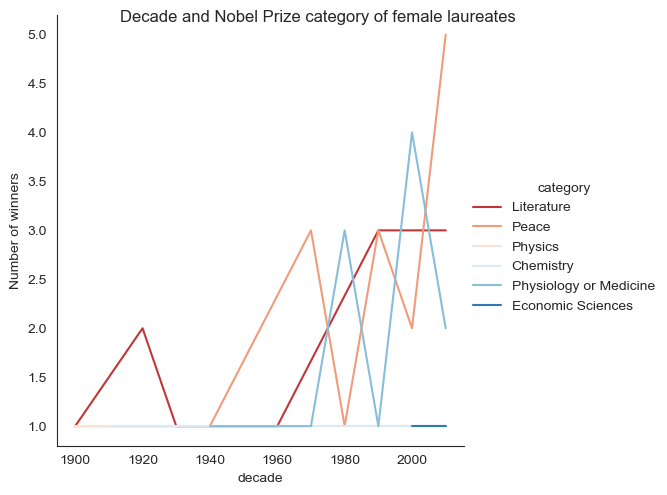

In [4]:
nobel_prize_df['is_female'] =  nobel_prize_df['gender'] == 'female' 
total = nobel_prize_df.groupby(["decade", "category"]).size()
female = nobel_prize_df[nobel_prize_df['is_female']].groupby(["decade", "category"]).size()
ratio = female/total
max_decade_category = ratio.idxmax()
list_index =list(max_decade_category)
max_female_dict = {str(list_index[0]) : list_index[1] }
print(max_female_dict)

female_df = female.reset_index()
female_df.rename(columns={ 0: 'count' }, inplace=True)
sns.set_palette('RdBu')
g = sns.relplot(data=female_df,x='decade',y='count',hue='category',kind='line')
g.figure.suptitle('Decade and Nobel Prize category of female laureates')
g.set(ylabel='Number of winners')
plt.show()

4.- Who was the first woman to receive a Nobel Prize, and in what category?

Result was storaged as string answers (first_woman_name and first_woman_category).

In [5]:
women_winners = nobel_prize_df[ nobel_prize_df['is_female']]
row = women_winners[ women_winners['awardYear']== women_winners['awardYear'].min()]
first_woman_name = row['fullName'].values[0]
first_woman_category = row['category'].values[0]
print( first_woman_name + '  '+ first_woman_category)

Marie Curie, née Sklodowska  Physics


5.- Which individuals or organizations have won more than one Nobel Prize throughout the years?

Result stored as full names in a list named repeat_list.

In [6]:
repeat_winners = nobel_prize_df['fullName'].value_counts()
repeat_list= list(repeat_winners[ repeat_winners >=2 ].index)
print(repeat_list)

['John Bardeen', 'Frederick Sanger', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska']
